Basics of sound processing
======

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display, IPython.display as ipd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (14, 5)

### Audio features

Raw waveform                   

+ amplitude over time representation
+ can be used directly as an input to a machine learning systems
+ but at the moment time-frequency representations give better results.


Audio by itself comes in amplitude representation, where amplitude of the sound changes at a certain frequency over time. What we need to do is extract what frequencies are present in each unit of time - those frequencies, when combined, create sounds. Think of playing piano notes - each note resonates at a particular frequency and those frequencies combine to create a particular tune. If we know what notes are being played, we can attempt to classify a particular piano solo. Hence we need a mechanism of breaking down amplitude over time over frequencies over time: such representation is also commonly called a spectrogram.

### Waveforms

In [3]:
siren, sr = librosa.load("wav/siren.wav",mono=True)
ipd.Audio(data=siren,rate=sr)

Text(0.5,1,u'Siren')

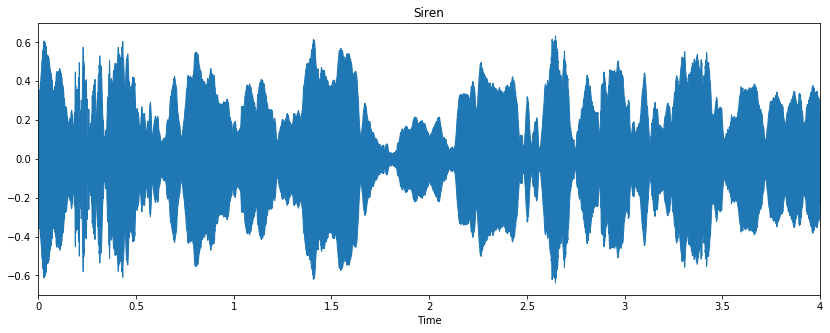

In [4]:
librosa.display.waveplot(siren, sr=sr)
plt.title('Siren')

In [5]:
jackhammer, sr = librosa.load("wav/jackhammer.wav",mono=True)
ipd.Audio(data=jackhammer,rate=sr)

Text(0.5,1,u'Jackhammer')

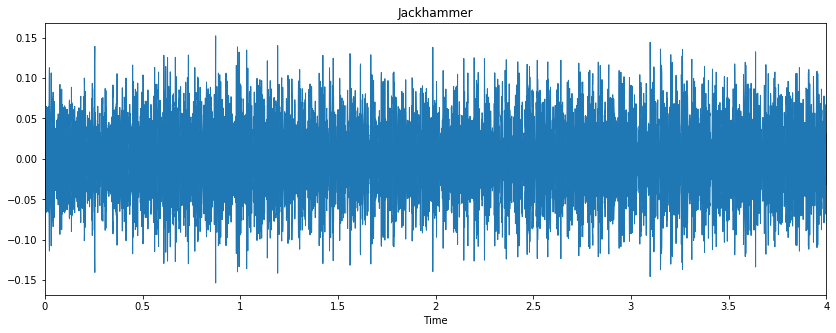

In [6]:
librosa.display.waveplot(jackhammer, sr=sr)
plt.title('Jackhammer')

In [7]:
dog_bark, sr = librosa.load("wav/dog_bark.wav",mono=True)
ipd.Audio(data=dog_bark,rate=sr, embed=True)

Text(0.5,1,u'Dog bark')

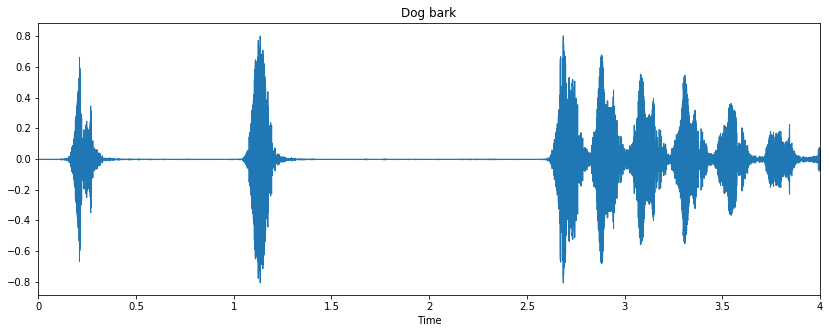

In [8]:
librosa.display.waveplot(dog_bark, sr=sr)
plt.title('Dog bark')

In [9]:
children_playing, sr = librosa.load("wav/children_playing.wav",mono=True)
ipd.Audio(data=children_playing,rate=sr)

Text(0.5,1,u'Children playing')

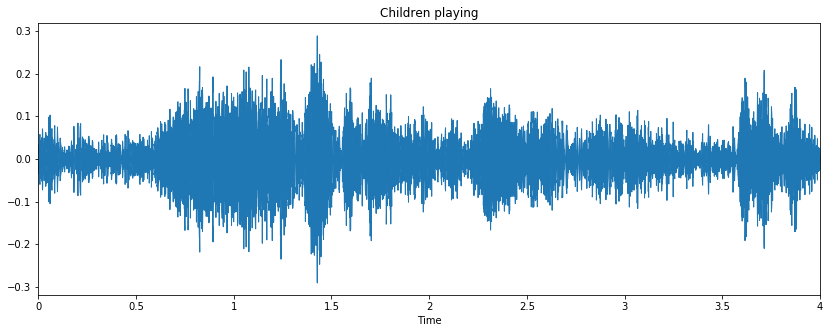

In [10]:
librosa.display.waveplot(children_playing, sr=sr)
plt.title('Children playing')

### Time-frequency representation

#### Spectrograms

<figure>
  <img width="600" style="float:right" src='figures/stft2.png'  alt='missing' />
</figure>

+ Break sound apart into different frequencies
    - Fourier transform
    
    
+ Measure how the energy changes over time
    - Short Time Fourier Transform
    
    
+ Analyse cutting the file with an (overlaping) window













+ Complex-valued coefficient for each frequency:
    - X(f) = $Ae^{jφ}$
        - A = Magnitude (energy) 
        - φ = Phase (shift)
    
    
+ Usually we discard phase and analyze only the magnitude:
    - Phase is non-linear and depends on frame alignment 
    - Complex values are a nuisance 
    - Energy carries a lot of information anyway

In [11]:
# Number of frequency bins for Fast Fourier Transform
N_FFT = 1024
# Number of audio frames between STFT columns
HOP_SIZE=1024
# Number of FFT bins in each window 
WIN_LENGTH=1024
# Windowing function
WINDOW='hann'
# Sampling frequency
SR=22050

In [12]:
siren, sr = librosa.load("wav/siren.wav",mono=True)
ipd.Audio(data=siren,rate=sr)

Text(0.5,1,u'Siren')

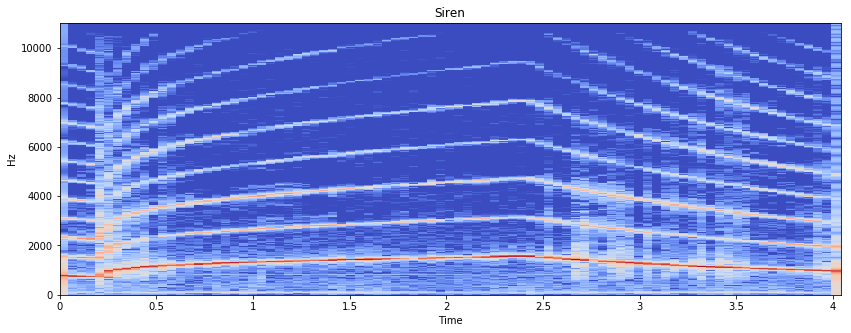

In [13]:
D_siren =librosa.stft(siren, n_fft=N_FFT, hop_length=HOP_SIZE, window = WINDOW, win_length = WIN_LENGTH)
stft_siren =np.abs(D_siren)**2

librosa.display.specshow(librosa.core.logamplitude(stft_siren),sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.title('Siren')

In [14]:
jackhammer, sr = librosa.load("wav/jackhammer.wav",mono=True)
ipd.Audio(data=jackhammer,rate=sr)

Text(0.5,1,u'Jackhammer')

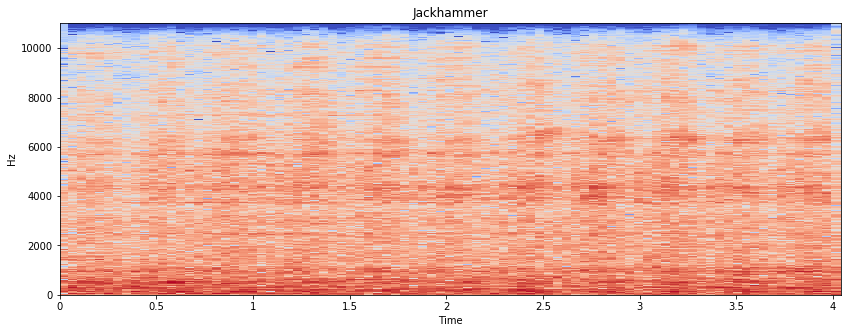

In [15]:
D_jackhammer =librosa.stft(jackhammer, n_fft=N_FFT, hop_length=HOP_SIZE, window = WINDOW, win_length = WIN_LENGTH)
stft_jackhammer =np.abs(D_jackhammer)**2

librosa.display.specshow(librosa.core.logamplitude(stft_jackhammer),sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.title('Jackhammer')

In [16]:
dog_bark, sr = librosa.load("wav/dog_bark.wav",mono=True)
ipd.Audio(data=dog_bark,rate=sr)

Text(0.5,1,u'Dog bark')

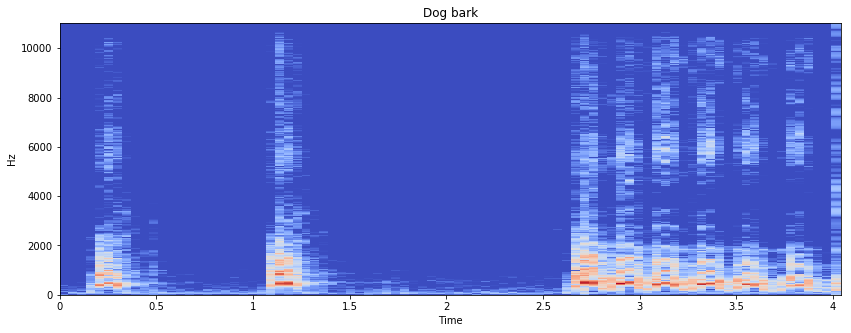

In [27]:
D_dog_bark =librosa.stft(dog_bark, n_fft=N_FFT, hop_length=HOP_SIZE, window = WINDOW, win_length = WIN_LENGTH)
stft_dog_bark =np.abs(D_dog_bark)**2

librosa.display.specshow(librosa.core.logamplitude(stft_dog_bark),sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.title('Dog bark')

In [18]:
children_playing, sr = librosa.load("wav/children_playing.wav",mono=True)
ipd.Audio(data=children_playing,rate=sr)

Text(0.5,1,u'Children playing')

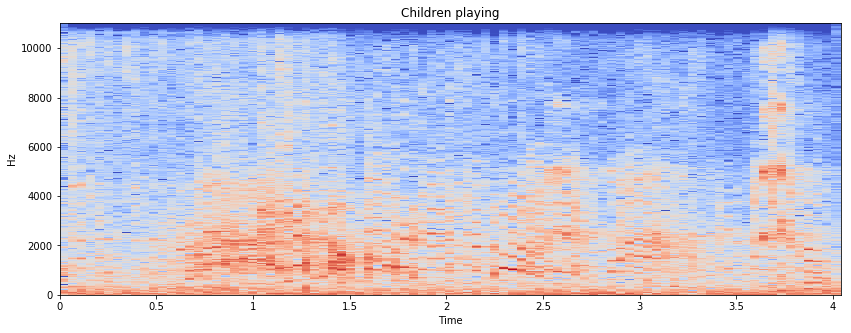

In [19]:
D_children_playing =librosa.stft(children_playing,  n_fft=N_FFT, hop_length=HOP_SIZE, window = WINDOW, win_length = WIN_LENGTH)
stft_children_playing =np.abs(D_children_playing)**2

librosa.display.specshow(librosa.core.logamplitude(stft_children_playing),sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.title('Children playing')

#### Mel-spectrograms

Mel scale comes from *melody* : it is inspired by human hearing system.

Mel frequency spacing approximates the mapping of frequencies to patches of nerves in the cochlea.

<img src="figures/melbank.png">

More resolution on lower frequencies, less on higher.


In [20]:
N_MELS =  40

Text(0.5,1,u'Siren')

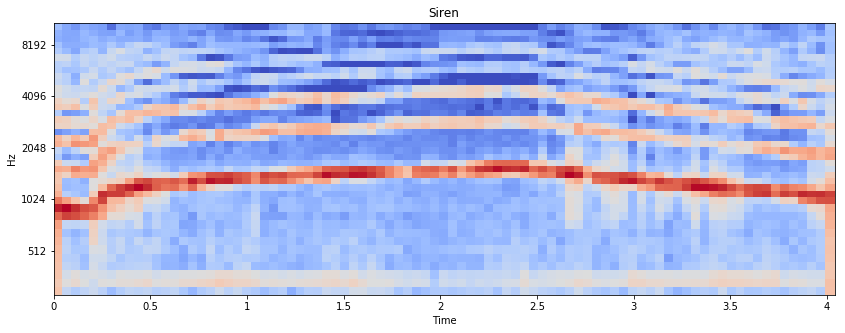

In [21]:
melspec_siren = librosa.feature.melspectrogram( y=None, S=stft_siren, sr=SR, n_fft=N_FFT, hop_length=HOP_SIZE,
        n_mels=N_MELS, htk=True, fmin=0.0, fmax=SR/2.0)
logmel_siren = librosa.core.logamplitude(melspec_siren, ref=1.0)

librosa.display.specshow(logmel_siren,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
plt.title('Siren')

Text(0.5,1,u'Jackhammer')

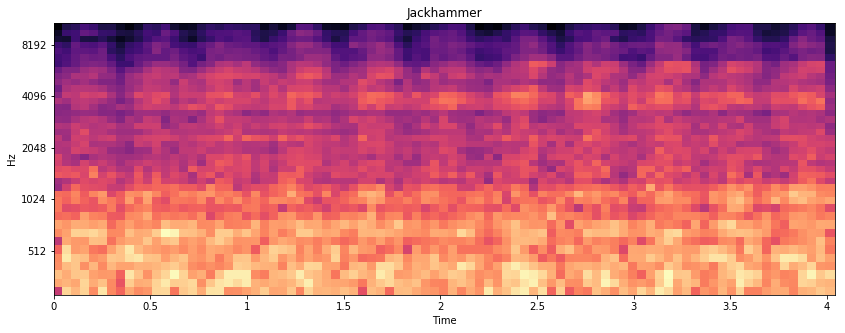

In [22]:
melspec_jackhammer = librosa.feature.melspectrogram( y=None, S=stft_jackhammer, sr=SR, n_fft=N_FFT, hop_length=HOP_SIZE,
        n_mels=N_MELS, htk=True, fmin=0.0, fmax=SR/2.0)
logmel_jackhammer = librosa.core.logamplitude(melspec_jackhammer, ref=1.0)

librosa.display.specshow(logmel_jackhammer,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
plt.title('Jackhammer')

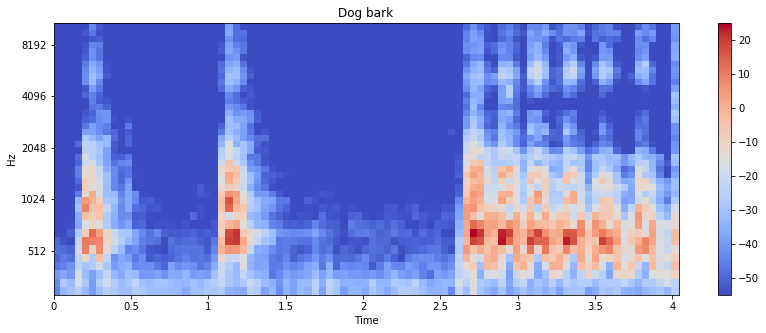

In [23]:
melspec_dog_bark = librosa.feature.melspectrogram( y=None, S=stft_dog_bark, sr=SR, n_fft=N_FFT, hop_length=HOP_SIZE,
        n_mels=N_MELS, htk=True, fmin=0.0, fmax=SR/2.0)
logmel_dog_bark = librosa.core.logamplitude(melspec_dog_bark, ref=1.0)

librosa.display.specshow(logmel_dog_bark,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
plt.title('Dog bark')
plt.colorbar()

Text(0.5,1,u'Children playing')

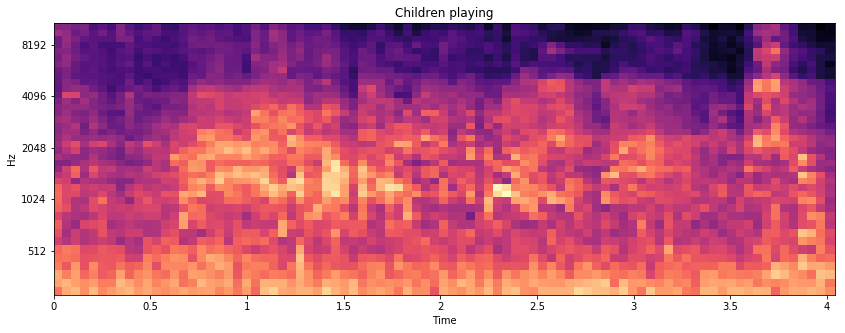

In [24]:
melspec_children_playing = librosa.feature.melspectrogram( y=None, S=stft_children_playing, sr=SR, n_fft=N_FFT, hop_length=HOP_SIZE,
        n_mels=N_MELS, htk=True, fmin=0.0, fmax=SR/2.0)
logmel_children_playing = librosa.core.logamplitude(melspec_children_playing, ref=1.0)

librosa.display.specshow(logmel_children_playing,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
plt.title('Children playing')


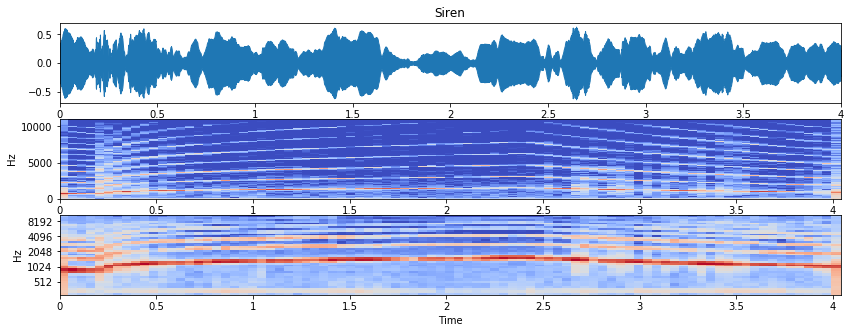

In [25]:
plt.subplot(3,1,1)
librosa.display.waveplot(siren, sr=sr)
plt.title('Siren')
plt.subplot(3,1,2)
librosa.display.specshow(librosa.core.logamplitude(stft_siren),sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.subplot(3,1,3)
librosa.display.specshow(logmel_siren,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
